## Importing the necessary libraries

In [1]:
import wikipediaap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Extracting a Sample from the 7M Wikipedia Articles 

**Download link for data1.csv https://drive.google.com/file/d/1hc5sU9B_YeWTcH0mZyDYP5hYlhgC9ASo/view?usp=sharing**

In [48]:
df = pd.read_csv('data1.csv') #this csv has data about the 7M wikipedia articles 

In [49]:
df.head()

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject
0,Population_history_of_ancient_Egypt_Archive_8,NaN,NaN,NaN,NaN,NaN,NaN
1,Sin_Mirar_Atrás,NaN,NaN,NaN,NaN,NaN,NaN
2,RMWFC,NaN,NaN,NaN,NaN,NaN,NaN
3,Wilbur_E._Colyer,NaN,NaN,Stub,NaN,['biography','military history'
4,Salmson_B.9,NaN,NaN,Start,NaN,NaN,NaN


In [50]:
df.isnull().sum()

Article Name           2
Vital Article    5712467
Level            6093852
Class            2142371
Importance       5838602
Topic            2171800
Wikiproject      3662211
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153251 entries, 0 to 6153250
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Article Name   object
 1   Vital Article  object
 2   Level          object
 3   Class          object
 4   Importance     object
 5   Topic          object
 6   Wikiproject    object
dtypes: object(7)
memory usage: 328.6+ MB


In [52]:
#extracting feature articles 
featured = df[df['Class'] == 'FA']
featured.head()

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject
1118,History_of_biology,Yes,4,FA,History,['history of science','biology'
2394,Canberra,Yes,4,FA,Geography,['australia','cities']
2402,Edward_II_of_England,Yes,5,FA,People,['biography','military history'
2629,MTR,Yes,5,FA,Technology,[],NaN
3078,CM_Punk,NaN,NaN,FA,NaN,['biography','professional wrestling'


In [53]:
featured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 1118 to 6153112
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Article Name   5256 non-null   object
 1   Vital Article  996 non-null    object
 2   Level          996 non-null    object
 3   Class          5256 non-null   object
 4   Importance     996 non-null    object
 5   Topic          4963 non-null   object
 6   Wikiproject    4060 non-null   object
dtypes: object(7)
memory usage: 328.5+ KB


In [54]:
featured['Class'].isnull().sum()

0

In [55]:
#Extracting Non Featured Articles
non_featured = df[(df['Class'] != 'FA')]

In [56]:
non_featured = non_featured.dropna()
non_featured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23306 entries, 107 to 6152520
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Article Name   23306 non-null  object
 1   Vital Article  23306 non-null  object
 2   Level          23306 non-null  object
 3   Class          23306 non-null  object
 4   Importance     23306 non-null  object
 5   Topic          23306 non-null  object
 6   Wikiproject    23306 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [57]:
non_featured.head()

,Article Name,Vital Article,Level,Class,Importance,Topic,Wikiproject
107,Siege_of_Baghdad_(1258),Yes,5,C,History,['iraq','mongols']
348,West_Midlands_(county),Yes,5,Start,Geography,['uk geography','england'
818,Kurbat_Ivanov,Yes,5,Start,People,['biography','russia'
912,Orson_Scott_Card,Yes,5,B,People,['banner shell','biography'
1249,Tench,Yes,5,Start,Biology,['fishes','aquarium fishes'


## Feature engineering

#### Extracting New Features For Featured Articles  

**Refer https://pypi.org/project/Wikipedia-API/ for more information regarding wikipedia api sytax**

In [58]:
links = []
catogories = []
text_len = []
back_links = []
titles = []
sections = []
lang_links = [] 

In [ ]:
def extractor(article):
    for i in article:
        page_py = wk_en.page(i)
        text_len.append(len(page_py.text))
        links.append(len(page_py.links))
        catogories.append(len(page_py.categories))
        back_links.append(len(page_py.backlinks))
        titles.append(len(page_py.title))
        sections.append(len(page_py.sections))
        lang_links.append(len(page_py.langlinks))
    
extractor(featured['Article Name'])

In [ ]:
linkx = pd.Series(links)
catogoriesx = pd.Series(carogories)
text_lenx = pd.Series(text_len)
back_linksx = pd.Series(back_links)
titlesx = pd.Series(sectionx)
sectionx = pd.Series(section)
lang_linksx = pd.Series(lang_links)

In [ ]:
featured['links'] = linksx
featured['catogories'] = catogoriesx
featured['text_len'] = text_lenx
featured['back_links'] = back_linksx
featured['titles'] = titlesx
featured['sections'] = sectionsx
featured['lang_links'] = lang_linksx

In [ ]:
# Assigning value 1 for Featured class
featured['class'] = 1

In [ ]:
featured.to_csv('FEATURED.csv')

#### Extracting New Features For Non_Featured Articles  

In [ ]:
df = non_featured.sample(n=5000,random_state=0)

In [ ]:
df = non_featured.sample(n=5000,random_state=0)

In [ ]:
df['Article Name'].count()

In [ ]:
df['Article Name'].isnull().sum()

In [ ]:
links = []
catogories = []
text_len = []
back_links = []
titles = []
sections = []
lang_links = [] # dont run this cell

In [ ]:
def extractor(article):
    for i in article:
        page_py = wk_en.page(i)
        text_len.append(len(page_py.text))
        links.append(len(page_py.links))
        catogories.append(len(page_py.categories))
        back_links.append(len(page_py.backlinks))
        titles.append(len(page_py.title))
        sections.append(len(page_py.sections))
        lang_links.append(len(page_py.langlinks))
    
extractor(df['Article Name'])

In [ ]:
linkx = pd.Series(links)
catogoriesx = pd.Series(carogories)
text_lenx = pd.Series(text_len)
back_linksx = pd.Series(back_links)
titlesx = pd.Series(sectionx)
sectionx = pd.Series(section)
lang_linksx = pd.Series(lang_links)

In [ ]:
df['links'] = linksx
df['catogories'] = catogoriesx
df['text_len'] = text_lenx
df['back_links'] = back_linksx
df['titles'] = titlesx
df['sections'] = sectionsx
df['lang_links'] = lang_linksx

In [ ]:
# Assigning value 0 for non Featured class
df['class'] = 0

In [ ]:
df = pd.read_csv('nonfeatured.csv')
df

## Final Data

In [ ]:
dff = pd.read_csv('FEATURED1.csv')
dfnf =  pd.read_csv('nonfeatured.csv')

In [2]:
df = pd.read_csv('final_data.csv')
df = df.iloc[:,1:]
df.head()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
0,6238,38,6,22,4,26,22,1
1,2188,39,1,18,5,0,14,1
2,2589,19,0,17,2,15,14,1
3,1490,47,4,10,3,16,4,1
4,1012,71,24,19,2,52,9,1


In [ ]:
df = pd.concat(dff,dfnf)

In [ ]:
df.to_csv('final_data.csv')

### Data Cleaning / Data Preprocessing

In [75]:
df = pd.read_csv('final_data.csv')

In [76]:
df = df.iloc[:,1:]
df

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
0,6238,38,6,22,4,26,22,1
1,2188,39,1,18,5,0,14,1
2,2589,19,0,17,2,15,14,1
3,1490,47,4,10,3,16,4,1
4,1012,71,24,19,2,52,9,1
...,...,...,...,...,...,...,...,...
10251,3305,842,94,16,12,4451,39,0
10252,3194,262,4,15,12,173,12,0
10253,3194,280,1,36,9,184,7,0
10254,3194,262,11,19,10,188,48,0


In [77]:
#checking for null values
df.isnull().sum()

text_lenght    0
links          0
lang_links     0
titles         0
sections       0
back_links     0
categories     0
class          0
dtype: int64

In [78]:
#handling duplicate values
df.duplicated().sum()

178

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.duplicated().sum()

0

In [81]:
#checking data structure of the DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10078 entries, 0 to 10255
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   text_lenght  10078 non-null  int64
 1   links        10078 non-null  int64
 2   lang_links   10078 non-null  int64
 3   titles       10078 non-null  int64
 4   sections     10078 non-null  int64
 5   back_links   10078 non-null  int64
 6   categories   10078 non-null  int64
 7   class        10078 non-null  int64
dtypes: int64(8)
memory usage: 708.6 KB


In [82]:
df.describe()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
count,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000
mean,12861.211451,254.417642,17.998412,19.068764,6.470232,924.906231,19.724747,0.478964
std,17533.378748,294.989253,30.529780,10.082656,4.327775,11926.675124,16.657411,0.499582
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1634.500000,56.000000,2.000000,12.000000,3.000000,19.000000,9.000000,0.000000
50%,3305.000000,164.000000,7.000000,17.000000,6.000000,154.000000,15.000000,0.000000
75%,18998.750000,334.000000,20.000000,24.000000,9.000000,403.750000,24.000000,1.000000
max,132606.000000,2761.000000,312.000000,95.000000,107.000000,678427.000000,180.000000,1.000000


In [83]:
df.corr()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
text_lenght,1.000000,0.518021,0.428108,-0.044594,0.512592,0.107673,0.449865,-0.459124
links,0.518021,1.000000,0.639433,-0.056606,0.544486,0.189182,0.561756,-0.399087
lang_links,0.428108,0.639433,1.000000,-0.233006,0.443066,0.323072,0.576077,-0.346882
titles,-0.044594,-0.056606,-0.233006,1.000000,-0.016165,-0.043112,-0.152247,0.034183
sections,0.512592,0.544486,0.443066,-0.016165,1.000000,0.098231,0.484156,-0.562935
back_links,0.107673,0.189182,0.323072,-0.043112,0.098231,1.000000,0.120841,-0.064249
categories,0.449865,0.561756,0.576077,-0.152247,0.484156,0.120841,1.000000,-0.405880
class,-0.459124,-0.399087,-0.346882,0.034183,-0.562935,-0.064249,-0.405880,1.000000


### EDA

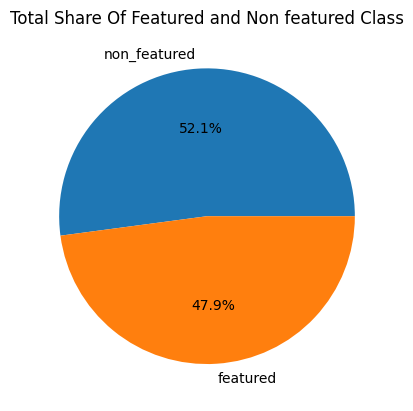

In [84]:
#checking for data imbalance
x = df['class'].value_counts().to_list()
plt.pie(x,labels=['non_featured','featured'],autopct='%1.1f%%')
plt.title("Total Share Of Featured and Non featured Class")
plt.show()

#### Seperating the feature and non-featured class

In [85]:
featured = df[df['class'] == 1]
featured.head()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
0,6238,38,6,22,4,26,22,1
1,2188,39,1,18,5,0,14,1
2,2589,19,0,17,2,15,14,1
3,1490,47,4,10,3,16,4,1
4,1012,71,24,19,2,52,9,1


In [86]:
non_featured = df[df['class'] == 0]
non_featured.head()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
5000,49899,849,38,18,13,871,10,0
5001,62765,820,175,8,13,11139,46,0
5002,74416,536,68,20,16,2321,49,0
5003,59747,839,39,3,13,2435,36,0
5004,65100,1278,42,7,11,3446,57,0


In [87]:
featured.corr()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
text_lenght,1.000000,0.513839,0.475569,0.004400,0.507788,0.124448,0.392120,NaN
links,0.513839,1.000000,0.449485,0.096401,0.413046,0.175033,0.323013,NaN
lang_links,0.475569,0.449485,1.000000,-0.151169,0.289573,0.275343,0.448867,NaN
titles,0.004400,0.096401,-0.151169,1.000000,0.086301,-0.011621,-0.068897,NaN
sections,0.507788,0.413046,0.289573,0.086301,1.000000,0.196789,0.316592,NaN
back_links,0.124448,0.175033,0.275343,-0.011621,0.196789,1.000000,0.103931,NaN
categories,0.392120,0.323013,0.448867,-0.068897,0.316592,0.103931,1.000000,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
non_featured.corr()

,text_lenght,links,lang_links,titles,sections,back_links,categories,class
text_lenght,1.000000,0.385035,0.296911,-0.056890,0.320044,0.093249,0.309709,NaN
links,0.385035,1.000000,0.624818,-0.149516,0.488151,0.201394,0.524020,NaN
lang_links,0.296911,0.624818,1.000000,-0.317758,0.422583,0.336602,0.520198,NaN
titles,-0.056890,-0.149516,-0.317758,1.000000,-0.121290,-0.061475,-0.217196,NaN
sections,0.320044,0.488151,0.422583,-0.121290,1.000000,0.105813,0.423498,NaN
back_links,0.093249,0.201394,0.336602,-0.061475,0.105813,1.000000,0.111526,NaN
categories,0.309709,0.524020,0.520198,-0.217196,0.423498,0.111526,1.000000,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Model

#### Spliting the features and target

In [89]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [90]:
x

array([[6238,   38,    6, ...,    4,   26,   22],
       [2188,   39,    1, ...,    5,    0,   14],
       [2589,   19,    0, ...,    2,   15,   14],
       ...,
       [3194,  280,    1, ...,    9,  184,    7],
       [3194,  262,   11, ...,   10,  188,   48],
       [3305,  853,   63, ...,   11, 1245,   50]], dtype=int64)

In [91]:
feature_name = df.columns.values[:-1]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Scaling the features

 **Scaling the data is a good habit because**
  * Improves Model Convergence
  * Prevents Numeric Instability
  * Improves Regularization

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  #it is must to scale data for svm models

In [95]:
model = LogisticRegression(random_state = 0)

In [96]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test,model.predict(X_test))
acc

0.8253968253968254

#### SVM

**SVM (Support Vector Machine) is a powerful machine learning algorithm used for classification and regression problems. One of the strengths of SVM is that it can handle high-dimensional data efficiently. However, understanding which features are important for the SVM model can be challenging, especially if the number of features is large.**

In [97]:
model = SVC(kernel = 'linear', random_state = 0,probability=True)

In [98]:
model.fit(X_train,y_train)
preds = model.predict(X_test)

In [99]:
acc = accuracy_score(y_test,model.predict(X_test))
acc

0.8432539682539683

**In linear SVM models, the coefficients of the decision function can be used to determine the importance of the corresponding features. The magnitude of each coefficient indicates the degree to which the corresponding feature contributes to the classification decision. You can retrieve the coefficients of the linear SVM model using the coef_ attribute. You can then rank the features based on their absolute coefficient values to determine their importance.**

In [100]:
coef = model.coef_[0]
feature_names = np.array(feature_name)

# Rank features based on absolute coefficient values
feature_importance = abs(coef)
sorted_idx = np.argsort(feature_importance)[::-1]
ranked_features = feature_names[sorted_idx]

In [101]:
ranked_features

array(['back_links', 'sections', 'text_lenght', 'lang_links',
       'categories', 'links', 'titles'], dtype=object)

#### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
for k in range(80,210,10):
    model = RandomForestClassifier(n_estimators =k, criterion = 'entropy', random_state = 0)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print('n_estimators:',k,'AUROC:',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

n_estimators: 80 AUROC: 0.9894344485201112
n_estimators: 90 AUROC: 0.9901642146787251
n_estimators: 100 AUROC: 0.9899972133506199
n_estimators: 110 AUROC: 0.9902338809132304
n_estimators: 120 AUROC: 0.9903559203453074
n_estimators: 130 AUROC: 0.9904305274475083
n_estimators: 140 AUROC: 0.990634585283329
n_estimators: 150 AUROC: 0.9906439729319505
n_estimators: 160 AUROC: 0.9906701595307362
n_estimators: 170 AUROC: 0.9906118572919301
n_estimators: 180 AUROC: 0.9905748007842144
n_estimators: 190 AUROC: 0.9904557258727549
n_estimators: 200 AUROC: 0.9904315156210473


In [104]:
 model = RandomForestClassifier(n_estimators =160, criterion = 'entropy', random_state = 0)

In [105]:
model.fit(X_train,y_train)
preds = model.predict(X_test)

In [106]:
acc = accuracy_score(y_test,model.predict(X_test))
acc

0.9637896825396826

#### XGB

In [107]:
import xgboost as xgb

In [108]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train,y_train) #train the model
    print("Learning rate : ", lr,"AUROC",roc_auc_score(y_test,model.predict(X_test)))

Learning rate :  0.01 AUROC 0.9863666637680242
Learning rate :  0.02 AUROC 0.9875855758284846
Learning rate :  0.03 AUROC 0.9897956259486467
Learning rate :  0.04 AUROC 0.9906543487541107
Learning rate :  0.05 AUROC 0.9902526562104729
Learning rate :  0.06 AUROC 0.9896029321085251
Learning rate :  0.07 AUROC 0.9902116470086011
Learning rate :  0.08 AUROC 0.9893301962117379
Learning rate :  0.09 AUROC 0.9881779858651659
Learning rate :  0.1 AUROC 0.9896721042562611
Learning rate :  0.11 AUROC 0.9896622225208702
Learning rate :  0.12 AUROC 0.9897452290981532
Learning rate :  0.13 AUROC 0.9909493185555275
Learning rate :  0.14 AUROC 0.9893934393182393
Learning rate :  0.15 AUROC 0.9906988165633697
Learning rate :  0.2 AUROC 0.9885520095497091
Learning rate :  0.5 AUROC 0.985271767486719
Learning rate :  0.7 AUROC 0.9856665428155831
Learning rate :  1 AUROC 0.9754083133063495


In [109]:
model = xgb.XGBRegressor(learning_rate = 0.04, n_estimators=100, verbosity = 0)

In [110]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [111]:
print('AUROC:',roc_auc_score(y_test,model.predict(X_test)))

AUROC: 0.9906543487541107


#### Voting classifier

In [112]:
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators = 160, criterion = 'entropy', random_state = 0)
model_2 = xgb.XGBClassifier(learning_rate = 0.04, n_estimators=100, verbosity = 0)
model = VotingClassifier(estimators=[('RF', model_1), ('XGB', model_2)],voting='soft')
model.fit(X_train,y_train)
preds = model.predict(X_test)
auroc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

In [113]:
acc = accuracy_score(y_test,model.predict(X_test))
print('AUROC:',auroc,'ACCURACY_SCORE:',acc)

AUROC: 0.991283321211738 ACCURACY_SCORE: 0.9657738095238095


In [114]:
feature_importances = {}

# loop over each base estimator in the ensemble
for i, clf in enumerate(model.estimators_):
    # get feature importances for the base estimator
    importances = clf.feature_importances_
    # get feature names for the base estimator (assuming you have stored them in a list or array)
    feature_names = feature_name
    # store feature importances for the base estimator in the dictionary
    for feat, importance in zip(feature_names, importances):
        if feat in feature_importances:
            feature_importances[feat] += importance
        else:
            feature_importances[feat] = importance

# aggregate feature importances across all base estimators
total_importances = sum(feature_importances.values())

# calculate feature importance scores as percentages
feature_importance_scores = {feat: (importance / total_importances) * 100 for feat, importance in feature_importances.items()}

# sort feature importance scores in descending order
sorted_feature_importance_scores = {k: v for k, v in sorted(feature_importance_scores.items(), key=lambda item: item[1], reverse=True)}

# print feature importance scores with their original feature names
for feat, score in sorted_feature_importance_scores.items():
    print(feat, score)

back_links 54.499604239279066
text_lenght 24.1162235864099
sections 6.589424379425118
links 5.973336172652836
categories 3.8580668406438283
lang_links 3.179108435814944
titles 1.7842363457743062


**Using the Section column we are almost able to achieve the same accuracy achieved using all the features in svm**

In [115]:
x = df['sections'].values
y = df.iloc[:,-1].values

In [116]:
x = x.reshape(-1, 1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [118]:
model = SVC(kernel = 'linear', random_state = 0,probability=True)

In [119]:
model.fit(X_train,y_train)
preds = model.predict(X_test)

In [120]:
acc = accuracy_score(y_test,model.predict(X_test))
acc

0.8249007936507936